In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from tensorflow import keras

In [2]:
# Read csv file
diamonds_data = pd.read_csv('/content/drive/MyDrive/deep_learning/project/feed_forward_nn/Diamonds/diamonds.csv')

In [3]:
# Visualize first 5 rows of the dataframe
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# Check for null values
diamonds_data.isna().sum()
# Found 1 column with null values

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [5]:
# Drop any irrelevant features
diamonds_data_2 = diamonds_data.drop(columns=['Unnamed: 0'])

In [6]:
# Split features and labels dataset
diamonds_features = diamonds_data_2.drop(columns=['price'])
diamonds_labels = diamonds_data_2['price']

In [7]:
# Perform numerical encoding for features because its rank based
cut_categories = ['Fair','Good','Very Good','Premium','Ideal']
color_categories = ['J','I','H','G','F','E','D']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']
ordinal_encoder = OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])
diamonds_features[['cut','color','clarity']] = ordinal_encoder.fit_transform(diamonds_features[['cut','color','clarity']])

In [8]:
diamonds_features.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4.0,5.0,1.0,61.5,55.0,3.95,3.98,2.43
1,0.21,3.0,5.0,2.0,59.8,61.0,3.89,3.84,2.31
2,0.23,1.0,5.0,4.0,56.9,65.0,4.05,4.07,2.31
3,0.29,3.0,1.0,3.0,62.4,58.0,4.20,4.23,2.63
4,0.31,1.0,0.0,1.0,63.3,58.0,4.34,4.35,2.75


In [9]:
# Convert python list into numpy array for better performance
# Split the dataset into train and test
SEED = 12345

diamonds_features_np= np.array(diamonds_features)
diamonds_labels_np = np.array(diamonds_labels)

x_train, x_test, y_train, y_test = train_test_split(diamonds_features_np,diamonds_labels_np,test_size=0.2,random_state=SEED)


In [10]:
# Standardlize the data
standardizer = sklearn.preprocessing.StandardScaler()
standardizer.fit(x_train)
x_train = standardizer.transform(x_train)
x_test = standardizer.transform(x_test)


Model: "diamonds_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense (Dense)               (None, 32)                320       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


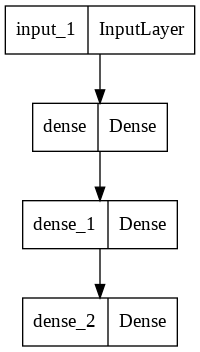

In [11]:
# Model creation using Functional API
inputs = tf.keras.Input(shape=(x_train.shape[-1],))
dense = tf.keras.layers.Dense(32,activation='relu')
x = dense(inputs)
dense = tf.keras.layers.Dense(16,activation='relu')
x = dense(x)
outputs = tf.keras.layers.Dense(1,activation='linear')(x)
model = tf.keras.Model(inputs=inputs,outputs=outputs,name='diamonds_model')

model.summary()
keras.utils.plot_model(model,to_file='diamondsmodel.png')

In [12]:
#Compile and train the model
model.compile(optimizer='adam',loss='mse', metrics=['mse','mae'])
history = model.fit(x_train,y_train,validation_data=(x_test,y_test), batch_size=8,epochs=20)

Epoch 1/20
5394/5394 [==============================] - 26s 5ms/step - loss: 6069652.5000 - mse: 6069652.5000 - mae: 1309.2318 - val_loss: 1509397.7500 - val_mse: 1509397.7500 - val_mae: 650.8333
Epoch 2/20
5394/5394 [==============================] - 10s 2ms/step - loss: 1119769.5000 - mse: 1119769.5000 - mae: 633.5670 - val_loss: 1421995.6250 - val_mse: 1421995.6250 - val_mae: 609.9376
Epoch 3/20
5394/5394 [==============================] - 10s 2ms/step - loss: 1049323.3750 - mse: 1049323.3750 - mae: 607.9323 - val_loss: 1388777.5000 - val_mse: 1388777.5000 - val_mae: 596.7067
Epoch 4/20
5394/5394 [==============================] - 11s 2ms/step - loss: 1011307.5625 - mse: 1011307.5625 - mae: 595.4942 - val_loss: 1383520.1250 - val_mse: 1383520.1250 - val_mae: 585.8267
Epoch 5/20
5394/5394 [==============================] - 18s 3ms/step - loss: 981549.5625 - mse: 981549.5625 - mae: 580.3662 - val_loss: 1340846.8750 - val_mse: 1340846.8750 - val_mae: 568.0276
Epoch 6/20
5394/5394 [====

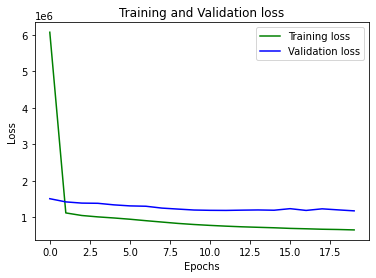

In [24]:
# Plot the training and validation loss

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = history.epoch
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

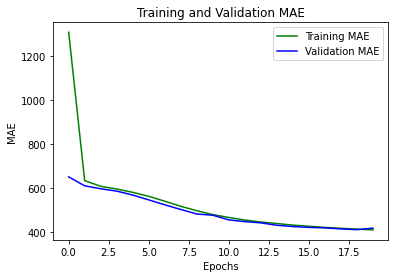

In [23]:
# Plot the training and validation MAE

training_mae = history.history['mae']
validation_mae = history.history['val_mae']
epochs = history.epoch
plt.plot(epochs, training_mae, 'g', label='Training MAE')
plt.plot(epochs, validation_mae, 'b', label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()